<a href="https://colab.research.google.com/github/mjtaheri11/video-synopsis/blob/master/hw41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive" -a

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
 C4droid.apk		     'Resume (2).gdoc'	 Resume.gdoc
'Colab Notebooks'	     'Resume (3).gdoc'	 seminar99.rar
 HW3			     'Resume (4).gdoc'	 test_image1.jpg
 HW4			     'Resume (5).gdoc'	 test_image2.jpg
 .ipynb_checkpoints	     'Resume (6).gdoc'	 test_image3.jpg
'Project proposal (1).gdoc'  'Resume (7).gdoc'	 test_image4.png
'Project proposal.gdoc'      'Resume (8).gdoc'	 test_image5.jpg
'Resume (1).gdoc'	     'Resume (9).gdoc'	 تعهد-compressed.pdf


# New Section

In [ ]:
!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

     |████████████████████████████████| 15.5MB 304kB/s 
     |████████████████████████████████| 21.4MB 1.1MB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.3.0.10 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time


0.7079808712005615
117


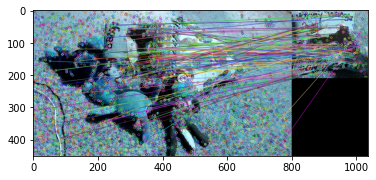

In [ ]:
start_time = time.time()
image = cv2.imread("drive/My Drive/HW4/image.jpg")
template = cv2.imread("drive/My Drive/HW4/template.jpg")

sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(image, None)
kp_2, desc_2 = sift.detectAndCompute(template, None)

index_params =dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc_1, desc_2, k=2)

good_point = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good_point.append(m)

end_time = time.time()
print(end_time - start_time)
print(len(good_point))
result = cv2.drawMatches(image, kp_1, template, kp_2, good_point, None)
plt.imshow(result)


0.6772449016571045
117


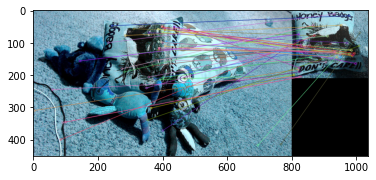

In [ ]:
start_time = time.time()
img1 = cv2.imread("drive/My Drive/HW4/image.jpg")          # queryImage
img2 = cv2.imread("drive/My Drive/HW4/template.jpg") # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
end_time = time.time()
print(end_time-start_time)
print(len(good))
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:50], None, flags=2)

plt.imshow(img3)

0.491321325302124
224


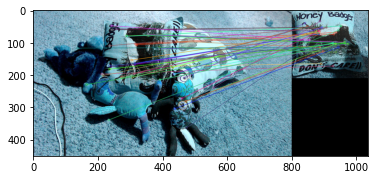

In [ ]:
start_time = time.time()
image = cv2.imread("drive/My Drive/HW4/image.jpg")
template = cv2.imread("drive/My Drive/HW4/template.jpg")

orb= cv2.ORB_create()
kp_1, desc_1 = sift.detectAndCompute(image, None)
kp_2, desc_2 = sift.detectAndCompute(template, None)

kp_1, desc_1 = orb.detectAndCompute(image, None)
kp_2, desc_2 = orb.detectAndCompute(template, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(desc_1, desc_2)
matches = sorted(matches, key=lambda x:x.distance)
end_time = time.time()
print(end_time-start_time)
print(len(matches))
matching_result = cv2.drawMatches(image, kp_1, template, kp_2, matches[0:50], None, flags=2)
plt.imshow(matching_result)
